[1-2] 다음 함수에 대해 물음에 답하라. $z = (x+2y)^3$의 편미분 $\frac{\delta z}{\delta x},\frac{\delta z}{\delta y}$를 구하라

A: $\frac{\delta z}{\delta x} =x에 관해 미분= 3(x+2y)^2$, $ \frac{\delta z}{\delta y} = y에 대해 미분 =  6(x+2y)^2$

2. p.155 [그림 5-8]과 같은 계산 그래프를 이용하여$\frac{\delta z}{\delta x},\frac{\delta z}{\delta y}$
를 구하라. 힌트: 계산 그래프를 구성하고, [그림 5-6]과 같이 각 노드별로 미분값을 곱하여 왼쪽으로 전달하다 보면, 각 위치에서의 미분값을 구할 수 있다.

$z = t^3$

$t = (x+2y)$

$\frac{\delta z}{\delta x} = \frac{\delta z}{\delta t}\frac{\delta t}{\delta x} = 3t^2 * 1 = 3(x+2y)^2$

 $\frac{\delta z}{\delta y} = \frac{\delta z}{\delta t}\frac{\delta t}{\delta y} = 3t^2* 2 = 6(x+2y)^2$

[3-5] 사과(apple) 3개, 과자(snack) 2개를 샀다. 사과는 1개에 200원이고 과자는 한 개에 200원이다. 사과의 소비세는 5%, 과자의 소비세는 10%이다. 지불금액을 구하려 한다.

3. 단순 손계산으로 지불금액을 계산하라

(3*200)*1.05 + (2*200)*1.1 = 630 + 440 = 1070

4. p.163 [그림 5-17]을 참고하여 계산 그래프를 그리시오.


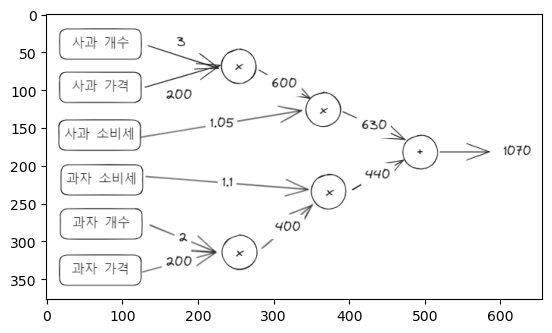

In [5]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image 
image = Image.open("C:\Workspace/cap.png")

imshow(np.asarray(image))

5. p.164 코드를 참고하여, dapple, dsnack, dapple_num, dsnack_num, dapple_tax, d_snack_tax
를 구하는 프로그램을 작성하시오. 여기서 dsnack은 과자 1개 값에 대한 지불금액이 변화율이다. 위 4
번과 답이 같은가?

In [14]:
apple = 200
snack = 200
apple_num = 3
snack_num = 2
apple_tax = 1.05
snack_tax = 1.1


class MulLayer():
    def __init__(self):
       self.x = None
       self.y = None 
       pass
    def forward(self, x,y):
        self.x = x
        self.y = y 
        return x*y
    def backward(self, dout):
        dx = dout*self.y
        dy = dout*self.x
        return dx,dy
    
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

mul_apple_layer = MulLayer()
mul_atax_layer = MulLayer()
mul_snack_layer = MulLayer()
mul_stax_layer = MulLayer()
add_layer = AddLayer()
#forward
apple_price_ori = mul_apple_layer.forward(apple,apple_num)
apple_price = mul_atax_layer.forward(apple_price_ori,apple_tax)
snack_price_ori = mul_snack_layer.forward(snack,snack_num)
snack_price = mul_stax_layer.forward(snack_price_ori,snack_tax)
price = add_layer.forward(apple_price,snack_price)
print(price)
#backward
dprice = 1
d_apple_price, d_snack_price = add_layer.backward(dprice)
dsnack_price_ori,d_snack_tax = mul_stax_layer.backward(d_snack_price)
dsnack,dsnack_num = mul_snack_layer.backward(dsnack_price_ori)

d_apple_price_ori , dapple_tax = mul_atax_layer.backward(d_apple_price)
dapple,dapple_num = mul_apple_layer.backward(d_apple_price_ori)
print("dapple:{0}, dsnack:{1}, dapple_num: {2}, dsnack_num: {3}, dapple_tax: {4}, d_snack_tax: {5}".format(dapple, dsnack, dapple_num, dsnack_num, dapple_tax, d_snack_tax))


1070.0
dapple:3.1500000000000004, dsnack:2.2, dapple_num: 210.0, dsnack_num: 220.00000000000003, dapple_tax: 600, d_snack_tax: 400
